In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Atur agar semua kolom terlihat
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)  # Hindari pemotongan teks
pd.set_option("display.max_colwidth", None)
# df = pd.read_csv('AB_US_2023.csv')
# dt = pd.read_csv('AB_US_2020.csv')

# Data Understanding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [9]:
df.shape

(232147, 18)

In [6]:
df.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

In [7]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
45177,17108083,NaN,114871749,Karina,Unincorporated Areas,Altadena,34.17161,-118.11570,Private room,125,2,0,NaN,NaN,1,0,0,Los Angeles
56137,15552406,NaN,78744320,Deonte,Other Cities,Walnut,34.04539,-117.85014,Shared room,35,1,0,NaN,NaN,1,0,0,Los Angeles
69445,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73323,-73.99294,Entire home/apt,225,30,1,2015-01-01,0.01,1,0,0,New York City
69598,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72100,-73.99536,Entire home/apt,215,30,5,2016-01-02,0.05,1,0,0,New York City
69680,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,30,0,NaN,NaN,1,0,0,New York City
69868,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85111,-73.93009,Private room,40,30,0,NaN,NaN,1,0,0,New York City
70951,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,30,0,NaN,NaN,1,0,0,New York City
72553,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76617,-73.98435,Entire home/apt,190,30,1,2016-01-05,0.01,1,0,0,New York City
72953,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80551,-73.95069,Entire home/apt,300,30,0,NaN,NaN,5,0,0,New York City
73267,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,80,30,3,2016-08-18,0.03,1,0,0,New York City


In [15]:
df.drop('neighbourhood_group', axis=1, inplace=True)

In [16]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [17]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.321470e+05,2.321470e+05,232147.000000,232147.000000,232147.000000,232147.000000,232147.000000,183062.000000,232147.000000,232147.000000,232147.000000
mean,2.584580e+17,1.582248e+08,36.610585,-98.301436,259.468001,13.495867,40.915230,1.638348,29.879055,180.985686,11.689701
std,3.465985e+17,1.587164e+08,5.126523,19.706929,1024.645918,27.920631,80.649152,1.910812,106.013665,134.715299,20.599954
min,6.000000e+00,2.300000e+01,25.957323,-123.089130,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.638896e+07,2.299242e+07,33.976225,-118.315111,91.000000,2.000000,1.000000,0.310000,1.000000,52.000000,0.000000
50%,4.896307e+07,1.005783e+08,36.190556,-97.727670,149.000000,3.000000,9.000000,1.000000,2.000000,175.000000,3.000000
75%,6.633014e+17,2.686930e+08,40.717440,-77.026222,250.000000,30.000000,43.000000,2.420000,10.000000,321.000000,16.000000
max,8.581014e+17,5.069384e+08,47.734010,-70.996000,100000.000000,1250.000000,3091.000000,101.420000,1003.000000,365.000000,1314.000000


In [21]:
df.duplicated().sum()

np.int64(0)

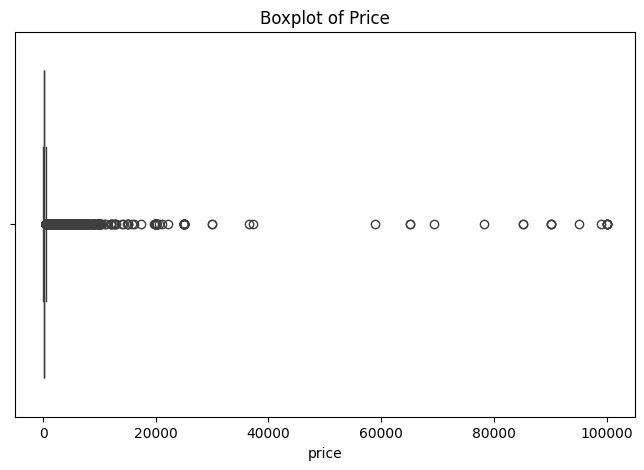

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.show()

In [24]:
df[df['price']==100000]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
136510,47475849,"WELCOME to ""WORLD MAP SUITE"" in the heart of P...",380705136,Duda,Mission Bay,32.79190,-117.23807,Private room,100000,1,1,2021-01-09,0.04,1,0,0,San Diego
200126,53810192,Enjoy Peace & tranquillity. A home away from home,430653443,Reginald,Pembroke Pines,26.02708,-80.24724,Entire home/apt,100000,3,14,2022-08-14,1.03,1,365,9,Broward County
231699,739802119944942774,amazing place in Menlo Park,199193340,Bardia,Unincorporated Areas,37.43787,-122.20727,Private room,100000,1,0,NaN,NaN,1,268,0,San Mateo County


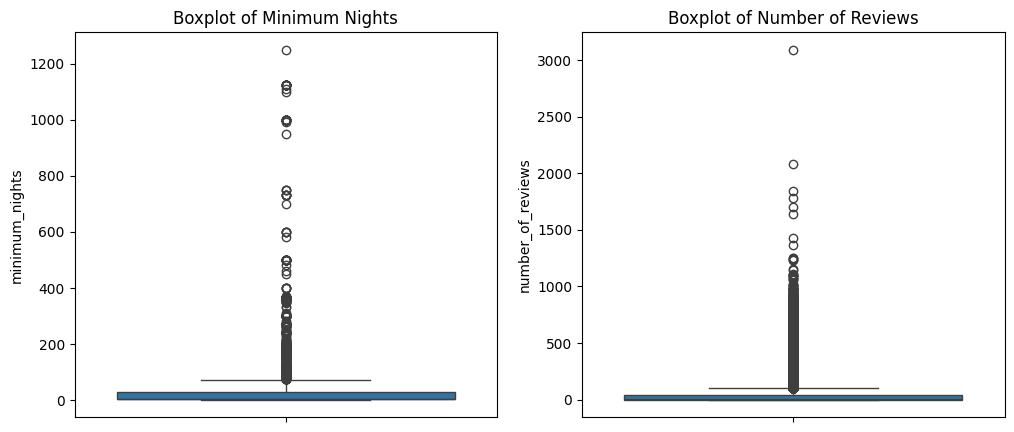

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['minimum_nights'], ax=axes[0])
axes[0].set_title("Boxplot of Minimum Nights")

sns.boxplot(y=df['number_of_reviews'], ax=axes[1])
axes[1].set_title("Boxplot of Number of Reviews")

plt.show()

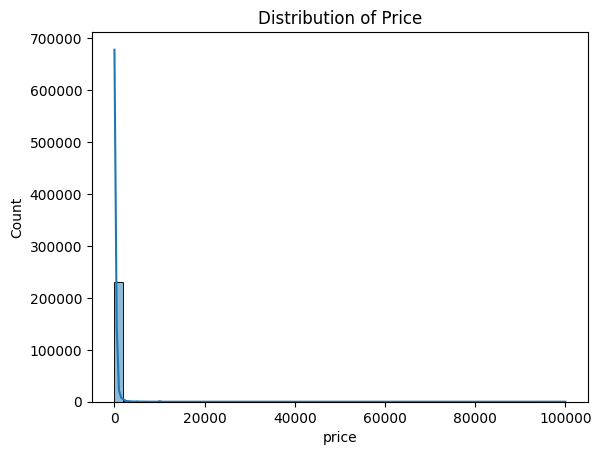

In [26]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.show()

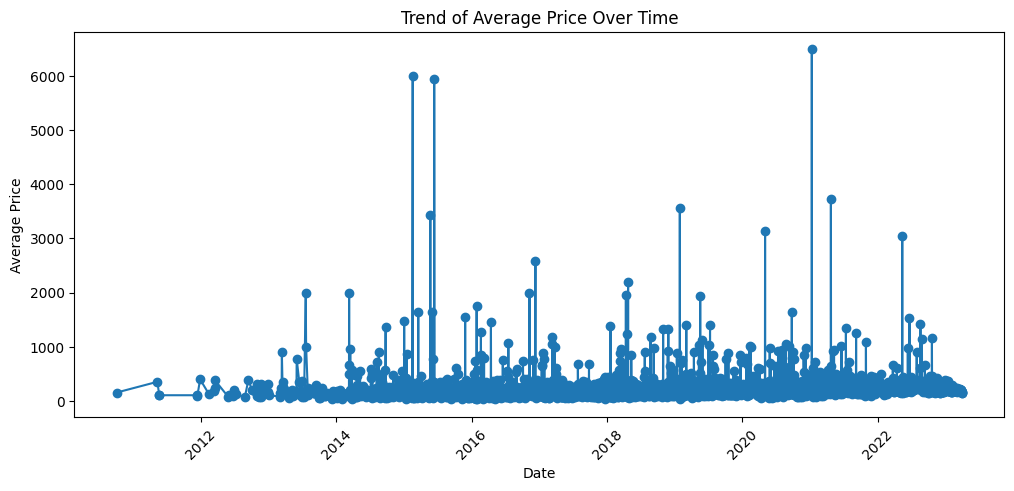

In [27]:
df['last_review'] = pd.to_datetime(df["last_review"])
df_time = df.groupby('last_review')['price'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(df_time['last_review'], df_time['price'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.title("Trend of Average Price Over Time")
plt.xticks(rotation=45)
plt.show()

In [9]:
df2 = pd.read_csv("airbnb-listings.csv", delimiter=";", low_memory=False)

In [10]:
df2.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


In [13]:
# Cek apakah kolom "Host Location" ada di dataset
if "Host Location" in df2.columns:
    # Pisahkan menjadi tiga kolom: Kota, Negara Bagian, Negara
    df2[['City', 'State', 'Country']] = df2['Host Location'].str.split(', ', n=2, expand=True)
    
    # Hapus spasi ekstra jika ada
    df2['City'] = df2['City'].str.strip()
    df2['State'] = df2['State'].str.strip()
    df2['Country'] = df2['Country'].str.strip()

else:
    print("Kolom 'Host Location' tidak ditemukan dalam dataset.")

In [19]:
df2['Country'].unique()

array(['Netherlands', 'The Netherlands', None, 'Belgium', 'Canada',
       'United Kingdom', 'United States', 'Germany', 'Portugal',
       'Australia', 'Greece', 'Switzerland', 'Italy', nan, 'Brazil',
       'Ireland', 'NW11 8SJ, London', 'United Arab Emirates', 'Spain',
       'Philippines', 'France', 'Russia', 'UK', 'Denmark', 'Chile',
       'Lithuania', 'Mexico',
       "United States Private Bedroom and Bathroom in beautiful Brentwood/West Los Angeles location.  Tree lined streets, great for walking/jogging along Brentwood's renowned Coral Tree lined San Vicente Boulevard.   Local supermarket  is",
       'India', 'China', 'Czech Republic', 'England, United Kingdom',
       'Sweden', 'Argentina', 'Baleares, Spain', 'Venezuela',
       'United KingdomMiami', 'London, UK', 'Vietnam', 'Finland',
       'Poland', 'Japan', 'Austria', 'New Zealand', 'Bangladesh',
       'Colombia', 'Estonia', 'Israel', 'Tunisia', 'Bolivia', 'Taiwan',
       'Bulgaria', 'Croatia', 'Hungary', 'Athens', '

In [ ]:
df2['usa'] = df2['Host Location'].str.contains("United States", case = False)
df2[df2['usa'] == True].head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,usa
220,14147419,https://www.airbnb.com/rooms/14147419,20170402075052,2017-04-02,"Beautiful, spacious top floor apartment w/ rooftop","Super spacious apartment, 2 minute walk to the famous Vondelpark. You’ll love the place because of the view of the city, the rooftop with a BBQ, the convenient location (30 minutes from the airport by train and tram, 15 minutes to central station by bike / tram, 10 minutes to museums in Museumplein via public transport), and the coziness. My place is good for couples, solo adventurers, and business travelers.","Rooftop balcony is the ideal perspective of Amsterdam. Feel free to BBQ or hang out in the hammock as you get a 360 perspective of the city. The living room is also spacious with a big couch, perfect for relaxing after a a day of exploring.","Super spacious apartment, 2 minute walk to the famous Vondelpark. You’ll love the place because of the view of the city, the rooftop with a BBQ, the convenient location (30 minutes from the airport by train and tram, 15 minutes to central station by bike / tram, 10 minutes to museums in Museumplein via public transport), and the coziness. My place is good for couples, solo adventurers, and business travelers. Rooftop balcony is the ideal perspective of Amsterdam. Feel free to BBQ or hang out in the hammock as you get a 360 perspective of the city. The living room is also spacious with a big couch, perfect for relaxing after a a day of exploring. The whole apartment will be your to use. Although we personally won't be here, a good friend of ours will be here to let you in and talk you through the place and give advice on the city. We will also be reachable via email and phone in case of any needs or questions. Overtoom is one of the most ideal neighborhoods of Amsterdam. Everything yo",none,"Overtoom is one of the most ideal neighborhoods of Amsterdam. Everything you need is in walking distance- from Vondelpark to the museums to restaurants, bars and grocery stores.",NaN,"The stop for tram 1 is just outside the front door. One direction is a direct line to Leidseplein and Central Station, and the other is convenient for getting to the airport (tram a few stops and then just a quick train ride away).",The whole apartment will be your to use.,"Although we personally won't be here, a good friend of ours will be here to let you in and talk you through the place and give advice on the city. We will also be reachable via email and phone in case of any needs or questions.",- Please be respectful of neighbors,https://a0.muscache.com/im/pictures/e598f177-8dd5-445d-9422-4c178c626c88.jpg?aki_policy=small,https://a0.muscache.com/im/pictures/e598f177-8dd5-445d-9422-4c178c626c88.jpg?aki_policy=medium,https://public.opendataso

In [28]:
df2[df2['usa']== True].count()

ID                                119313
Listing Url                       119313
Scrape ID                         119313
Last Scraped                      119312
Name                              119273
                                   ...  
Calculated host listings count    119310
Reviews per Month                  94477
Geolocation                       119312
Features                          119293
usa                               119313
Length: 90, dtype: int64